In [90]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit,fsolve
import matplotlib.pyplot as plt


In [100]:
df = pd.read_excel("data.xlsx")

In [101]:
df = df.tail(len(df)-1)

In [102]:
print(df)

   W   Plan  Real
1  1  0.005  0.02
2  2  0.020  0.04
3  3  0.170  0.22
4  4  0.380  0.30
5  5  0.640  0.58
6  6  0.820  0.79
7  7  0.870  0.85
8  8  0.940  0.88
9  9  0.970  0.98


In [103]:
smin, smax, t0 = df.Real.min(), 1, df.W.min()

In [104]:
def s_curve(t,k,a):

    return smin + (smax-smin)*(1/(1 + np.exp(-k*(t-t0))))**a



In [105]:
popt, _ = curve_fit(s_curve,df.W,df.Real)

In [106]:
popt

array([0.64940299, 7.92045529])

In [107]:
Pred = s_curve(df.W,popt[0],popt[1])

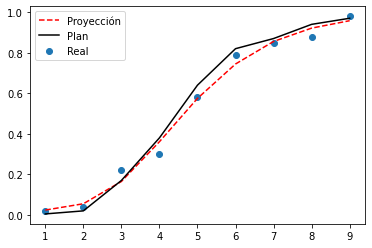

In [108]:
plt.scatter(df.W,df.Real, label= "Real")
plt.plot(df.W, Pred,color='red', linestyle='--', label ="Proyección");
plt.plot(df.W, df.Plan,color='black',label = "Plan")
plt.legend(loc="upper left")

In [51]:
def fitted_s_curve(t,k=popt[0],a=popt[1]):

    return smin + (smax-smin)*(1/(1 + np.exp(-k*(t-t0))))**a

In [77]:
def pending(t):

    return 0.999 - fitted_s_curve(t)

In [78]:
pending(df.W)

1    0.974755
2    0.944054
3    0.837783
4    0.647513
5    0.436854
6    0.266477
7    0.152399
8    0.083808
9    0.044942
Name: W, dtype: float64

In [79]:
fitted_pending(df.W)

1    0.975755
2    0.945054
3    0.838783
4    0.648513
5    0.437854
6    0.267477
7    0.153399
8    0.084808
9    0.045942
Name: W, dtype: float64

In [80]:
root = fsolve(pending,24)

In [83]:
root

array([15.05243802])

In [84]:
fitted_s_curve(15)

0.9989660676227767